In [2]:
def get_tiny_images(image_set):
    size=16
    tiny_images=[]
    
    for i in image_set:
        image=i.img
        label=i.label
        number=i.number
        trueLabel=i.trueLabel
        image=image.resize((size, size))                #resize
        image=(image - np.mean(image))/np.std(image)   #normalize
        image=image.flatten()                          #One-dimensional
        image=np.asarray(image)
        img=image_label(image,number,label,trueLabel)
        tiny_images.append(img)
    #tiny_images = np.asarray(tiny_images)
    
    return tiny_images

In [3]:
def k_nearest_neighbor_classify(train_feature, test_feature,k):
    #k =5
    for test in test_feature:
        test_img=test.img
        distance=[]
        counter=np.zeros(15)
        for train in train_feature:               
            train_img=train.img
            d=np.linalg.norm(test_img-train_img)      #calculate the distance
            distance.append((d,train.label))
        distance=sorted(distance,key=lambda d: d[0] )#sort the distance
        for i in range(k):
            counter[distance[i][1]]+=1  #choose k min distance
        max_index = np.argmax(counter)  #choose the max categories
        test.label=max_index


In [6]:
class image_label():    #Pack the image as a class to prevent corresponding errors

    def __init__(self, img=None,number=None,label=None,trueLabel=None):
        self.img = img     #image
        self.number=number #image number
        self.label=label   #image predict categories
        self.trueLabel=trueLabel  #image true categories

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
categories = ['bedroom', 'Coast', 'Forest', 'Highway', 'industrial',
           'Insidecity', 'kitchen', 'livingroom', 'Mountain', 'Office',
           'OpenCountry', 'store', 'Street', 'Suburb', 'TallBuilding'] 

train_img_set=[]
test_img_set=[]

for j in range(15):
    for i in range(100):
        img_PIL = Image.open("D:\\Master_course\\CV\\CW3\\training\\training\\"+categories[j]+"\\"+str(i)+".jpg")
        #img_PIL = np.array(img_PIL)
        img=image_label(img_PIL,i,j,j)
        train_img_set.append(img)
error=0
for i in range(2988):
    try:
        img_PIL = Image.open("D:\\Master_course\\CV\\CW3\\testing\\"+str(i)+".jpg")
        img=image_label(img_PIL,i)
        test_img_set.append(img)
        error=error+1
    except Exception as e:
        pass
    continue
   

In [49]:
from tqdm import tqdm
#get feature
train_feature =get_tiny_images(train_img_set)
test_feature =get_tiny_images(test_img_set)
#classification
k_nearest_neighbor_classify(train_feature,test_feature,14)



In [50]:
with open('D:\\run1.txt','a') as f:
    for t in test_feature:
        text = '\n'+str(t.number)+'.jpg'+' '+categories[t.label]
        f.write(text)
 

In [7]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img_set=[]
categories = ['bedroom', 'Coast', 'Forest', 'Highway', 'industrial',
           'Insidecity', 'kitchen', 'livingroom', 'Mountain', 'Office',
           'OpenCountry', 'store', 'Street', 'Suburb', 'TallBuilding'] 

for j in range(15):
    for i in range(100):
        img_PIL = Image.open("D:\\Master_course\\CV\\CW3\\training\\training\\"+categories[j]+"\\"+str(i)+".jpg")
        #img_PIL = np.array(img_PIL)
        img=image_label(img_PIL,i,j,j)
        img_set.append(img)
random.shuffle(img_set)

In [34]:
import math
import copy
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

split=math.floor(len(img_set)*0.7) 
train_set=img_set[:split]
test_set=img_set[split:]
train_feature_2 =get_tiny_images(train_set)
test_feature_2 =get_tiny_images(test_set)
A=np.zeros((15,15))

for i in tqdm(range(5)):
    train_feature_copy=train_feature_2.copy()
    test_feature_copy=test_feature_2.copy()
    k_nearest_neighbor_classify(train_feature_copy,test_feature_copy,14)
    counter=0
    predict=[]
    target=[]
    for t in test_feature_2:
    #print(t.label)
        predict.append(t.label)
        target.append(t.trueLabel)
    #print(t.trueLabel)
        if(t.label==t.trueLabel):
            counter+=1
    #print(counter)
    acc+=counter/len(test_feature_copy)
    
    A+=confusion_matrix(target, predict)
    #print(i," ",nter/lecoun(test_feature_copy))


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.55s/it]


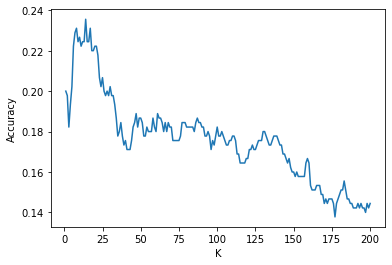

In [31]:
test = plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
#plt.title("Function 1")
#plt.ylim(-7000,-5000)
#plt.xlim(0,1000)
#plt.vlines(5,0.13,0.24,linestyle='--',color="red")#竖线
#plt.vlines(14,0.13,0.24,linestyle='--',color="red")#竖线

#plt.vlines(20,0.13,0.24,linestyle='--',color="red")#竖线

plt.plot(X, acc ,linestyle='-')
#plt.plot(X, CCGA_result, linestyle='--')
#plt.legend(["standard GA", "CCGA"])

In [35]:
print(acc/5)

0.2826666666666667


In [46]:
counter=0
predict=[]
target=[]
for t in test_feature_2:
    #print(t.label)
    predict.append(t.label)
    target.append(t.trueLabel)
    #print(t.trueLabel)
    if(t.label==t.trueLabel):
        counter+=1
print(counter)
print(counter/len(test_feature_2))

98
0.21777777777777776


[[ 2.  6.  3. 10.  0.  1.  0.  1.  1.  0.  4.  0.  3.  1.  0.]
 [ 0. 16.  1. 11.  0.  1.  0.  0.  2.  0.  7.  0.  1.  1.  0.]
 [ 1.  2.  5.  2.  0.  2.  0.  1.  1.  0.  2.  0.  7.  3.  0.]
 [ 0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.]
 [ 2.  6.  4. 11.  3.  4.  0.  1.  2.  0.  5.  0.  2.  0.  1.]
 [ 0.  4.  3.  5.  1.  1.  0.  0.  3.  0.  5.  0.  0.  3.  0.]
 [ 1.  6.  2.  5.  0.  0.  5.  3.  0.  4.  1.  1.  2.  0.  0.]
 [ 2.  2.  1. 12.  1.  0.  2.  2.  1.  0.  2.  0.  1.  4.  0.]
 [ 2.  5.  3.  8.  0.  0.  1.  1.  7.  0.  7.  0.  3.  0.  1.]
 [ 1.  8.  1.  5.  2.  1.  0.  0.  0.  7.  0.  1.  2.  0.  4.]
 [ 1.  3.  0.  5.  0.  0.  0.  0.  1.  0. 11.  0.  1.  2.  0.]
 [ 4.  7.  5.  0.  0.  0.  1.  0.  1.  2.  7.  0.  4.  0.  1.]
 [ 1.  0.  1.  4.  0.  0.  0.  0.  0.  0.  4.  0. 14.  3.  0.]
 [ 0.  3.  1.  3.  1.  1.  0.  0.  0.  1.  4.  0.  7.  8.  0.]
 [ 3.  2.  1.  2.  2.  0.  0.  1.  2.  1.  0.  1.  2.  0.  5.]]


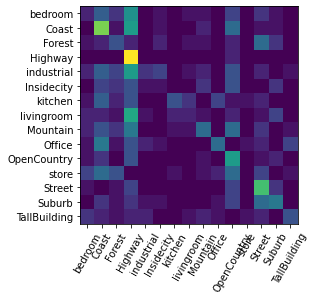

In [47]:
indices = range(len(A))
plt.imshow(A)
plt.xticks(indices, categories,rotation=60)
plt.yticks(indices, categories) 
print(A)